# 02 iRF for causal forest

In [1]:
import irf
from sklearn.datasets import load_boston, load_breast_cancer
from irf.ensemble import (RandomForestClassifierWithWeights,
                          RandomForestRegressorWithWeights)
import numpy as np
from irf import irf_jupyter_utils

In [2]:
X = np.random.normal(0,0.1,1000).reshape(100,10)
Z = np.zeros(100)
Z[:50] = 1
y = np.zeros(100)
y = np.random.uniform(0, 1, (100,)) * 10
full_y = np.concatenate([Z.reshape(100,1), y.reshape(100,1)], axis = 1)

In [3]:
rf = RandomForestRegressorWithWeights(criterion='heterogeneity_causal', max_depth=4, bootstrap=True,
                                      min_impurity_decrease=0)
rf.fit(X, full_y, feature_weight=np.ones((10,)))
rf.predict(X[:10])

array([[0.55393087, 4.90520376],
       [0.57246568, 5.8568567 ],
       [0.47946827, 4.9269447 ],
       [0.57336473, 4.88262481],
       [0.61673219, 5.29562816],
       [0.55574551, 4.69439836],
       [0.58882976, 5.00288143],
       [0.56924861, 5.77059773],
       [0.64152828, 6.26604142],
       [0.51965564, 5.7576387 ]])

In [4]:
rf.estimators_[0].tree_.feature

array([ 1,  1,  1, -2, -2,  1, -2,  5, -2, -2,  2,  9,  4, -2, -2,  3, -2,
       -2,  3, -2, -2])

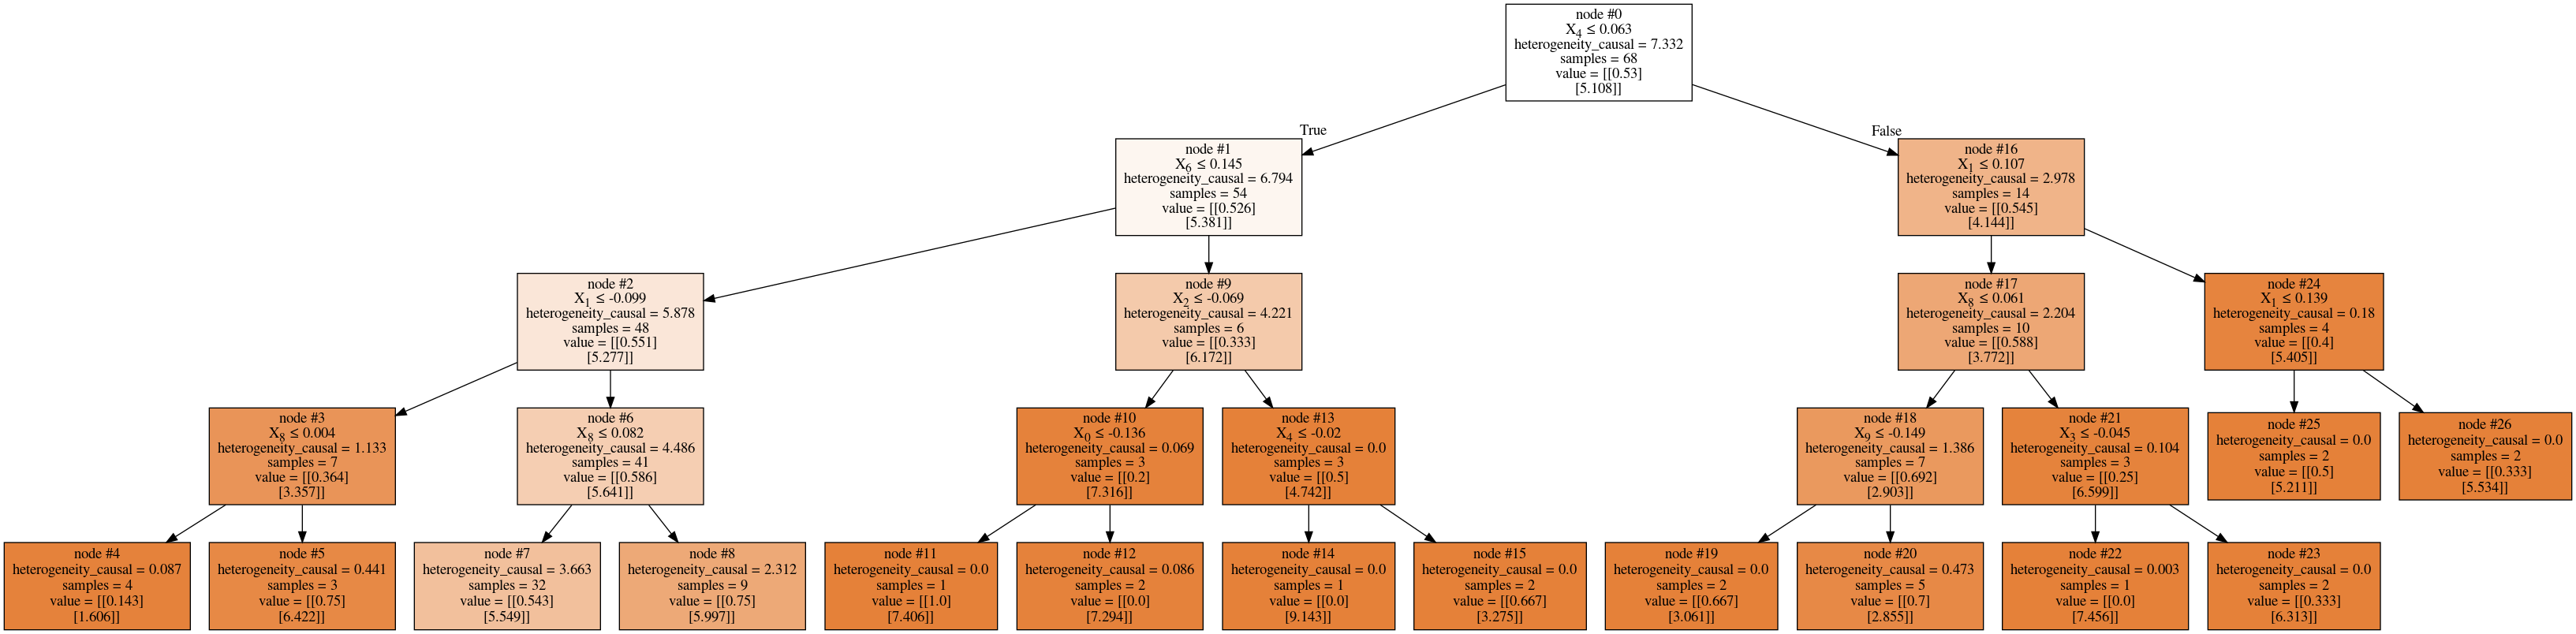

In [5]:
irf_jupyter_utils.draw_tree(decision_tree = rf.estimators_[3])